In [1]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn import neighbors
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [2]:
test_data=pd.read_excel("Test_dataset.xlsx")
test_data.head().transpose()

,0,1,2,3,4
people_ID,5942,18664,5603,5649,5099
Region,Delhi,Delhi,Delhi,Delhi,Delhi
Gender,Female,Male,Female,Female,Female
Designation,Mrs,Mr,Mrs,Mrs,Mrs
Name,smt rekha prajapat,nirmal,pinky,pooja @aafrin,anjali
Married,YES,YES,YES,YES,YES
Children,2,2,2,2,2
Occupation,Driver,Legal,Sales,Sales,Business
Mode_transport,Public,Walk,Car,Car,Car
cases/1M,4,4,4,4,4


In [3]:
train_data = pd.read_excel("Train_dataset.xlsx")

In [4]:
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
people_ID,14498.0,1.446996e+04,6.826922e+03,3887.0,7747.25,16467.5,20315.75,25212.0
Children,14498.0,9.789626e-01,8.118332e-01,0.0,0.00,1.0,2.00,2.0
cases/1M,14498.0,5.886743e+00,4.651725e+00,0.0,3.00,4.0,11.00,13.0
Deaths/1M,14498.0,1.342737e+00,9.535657e-01,0.0,1.00,1.0,2.00,3.0
Age,14498.0,4.208367e+01,1.532643e+01,16.0,29.00,42.0,55.00,68.0
Coma score,14498.0,8.985860e+00,3.754762e+00,3.0,6.00,9.0,12.00,15.0
Diuresis,14498.0,2.806576e+02,9.824068e+01,110.0,195.00,280.0,366.00,450.0
Platelets,14498.0,8.688647e+01,4.219445e+01,15.0,51.00,87.0,124.00,160.0
HBB,14498.0,1.140830e+02,5.520797e+01,20.0,66.00,113.0,162.00,210.0
d-dimer,14498.0,2.746673e+02,4.370616e+01,200.0,237.00,274.0,312.00,350.0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   people_ID               10714 non-null  int64  
 1   Region                  10714 non-null  object 
 2   Gender                  10714 non-null  object 
 3   Designation             10714 non-null  object 
 4   Name                    10694 non-null  object 
 5   Married                 10714 non-null  object 
 6   Children                10403 non-null  float64
 7   Occupation              9967 non-null   object 
 8   Mode_transport          10711 non-null  object 
 9   cases/1M                10714 non-null  int64  
 10  Deaths/1M               10714 non-null  int64  
 11  comorbidity             10488 non-null  object 
 12  Age                     10714 non-null  int64  
 13  Coma score              10714 non-null  int64  
 14  Pulmonary score         10714 non-null

In [6]:
train_data = pd.read_excel("Train_dataset.xlsx")
train_data.tail()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
10709,22691,Bengaluru,Male,Mr,ashish,NO,2.0,Business,Car,8,...,24.0,209.0,61.0,56.0,35,7,4000000.0,300000,0.0,41.981760
10710,22692,Bengaluru,Male,Mr,mohd mujahid ansari,YES,0.0,Manufacturing,Car,8,...,134.0,211.0,65.0,47.0,35,7,1500000.0,700000,NaN,47.148663
10711,22693,Bengaluru,Male,Mr,munnakumar,YES,0.0,Clerk,Public,8,...,151.0,296.0,87.0,37.0,16,5,3000000.0,2100000,2.0,47.708533
10712,22694,Bengaluru,Male,Mr,prakash,YES,1.0,Legal,Walk,8,...,110.0,253.0,56.0,70.0,28,5,2900000.0,700000,1.0,53.803565
10713,22695,Bengaluru,Male,Mr,mehboob mehandi,NO,2.0,Business,Car,8,...,134.0,201.0,82.0,60.0,4,3,2100000.0,1400000,0.0,68.342400


In [7]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
people_ID,10714.0,1.008489e+04,7.108664e+03,1.0000,2.679250e+03,1.000350e+04,1.514175e+04,22695.000
Children,10403.0,1.062770e+00,8.182223e-01,0.0000,0.000000e+00,1.000000e+00,2.000000e+00,2.000
cases/1M,10714.0,3.285888e+00,2.721274e+00,1.0000,2.000000e+00,2.000000e+00,4.000000e+00,8.000
Deaths/1M,10714.0,5.232406e-01,8.543033e-01,0.0000,0.000000e+00,0.000000e+00,1.000000e+00,2.000
Age,10714.0,4.208372e+01,1.532340e+01,16.0000,2.900000e+01,4.200000e+01,5.500000e+01,68.000
Coma score,10714.0,9.013067e+00,3.714970e+00,3.0000,6.000000e+00,9.000000e+00,1.200000e+01,15.000
Diuresis,9998.0,2.788063e+02,9.798553e+01,110.0000,1.940000e+02,2.760000e+02,3.640000e+02,450.000
Platelets,9790.0,8.779581e+01,4.185110e+01,15.0000,5.200000e+01,8.800000e+01,1.240000e+02,160.000
HBB,10698.0,1.161710e+02,5.517881e+01,20.0000,6.800000e+01,1.170000e+02,1.650000e+02,210.000
d-dimer,9600.0,2.752923e+02,4.366969e+01,200.0000,2.370000e+02,2.760000e+02,3.130000e+02,350.000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015758469BC8>,
      dtype=object)

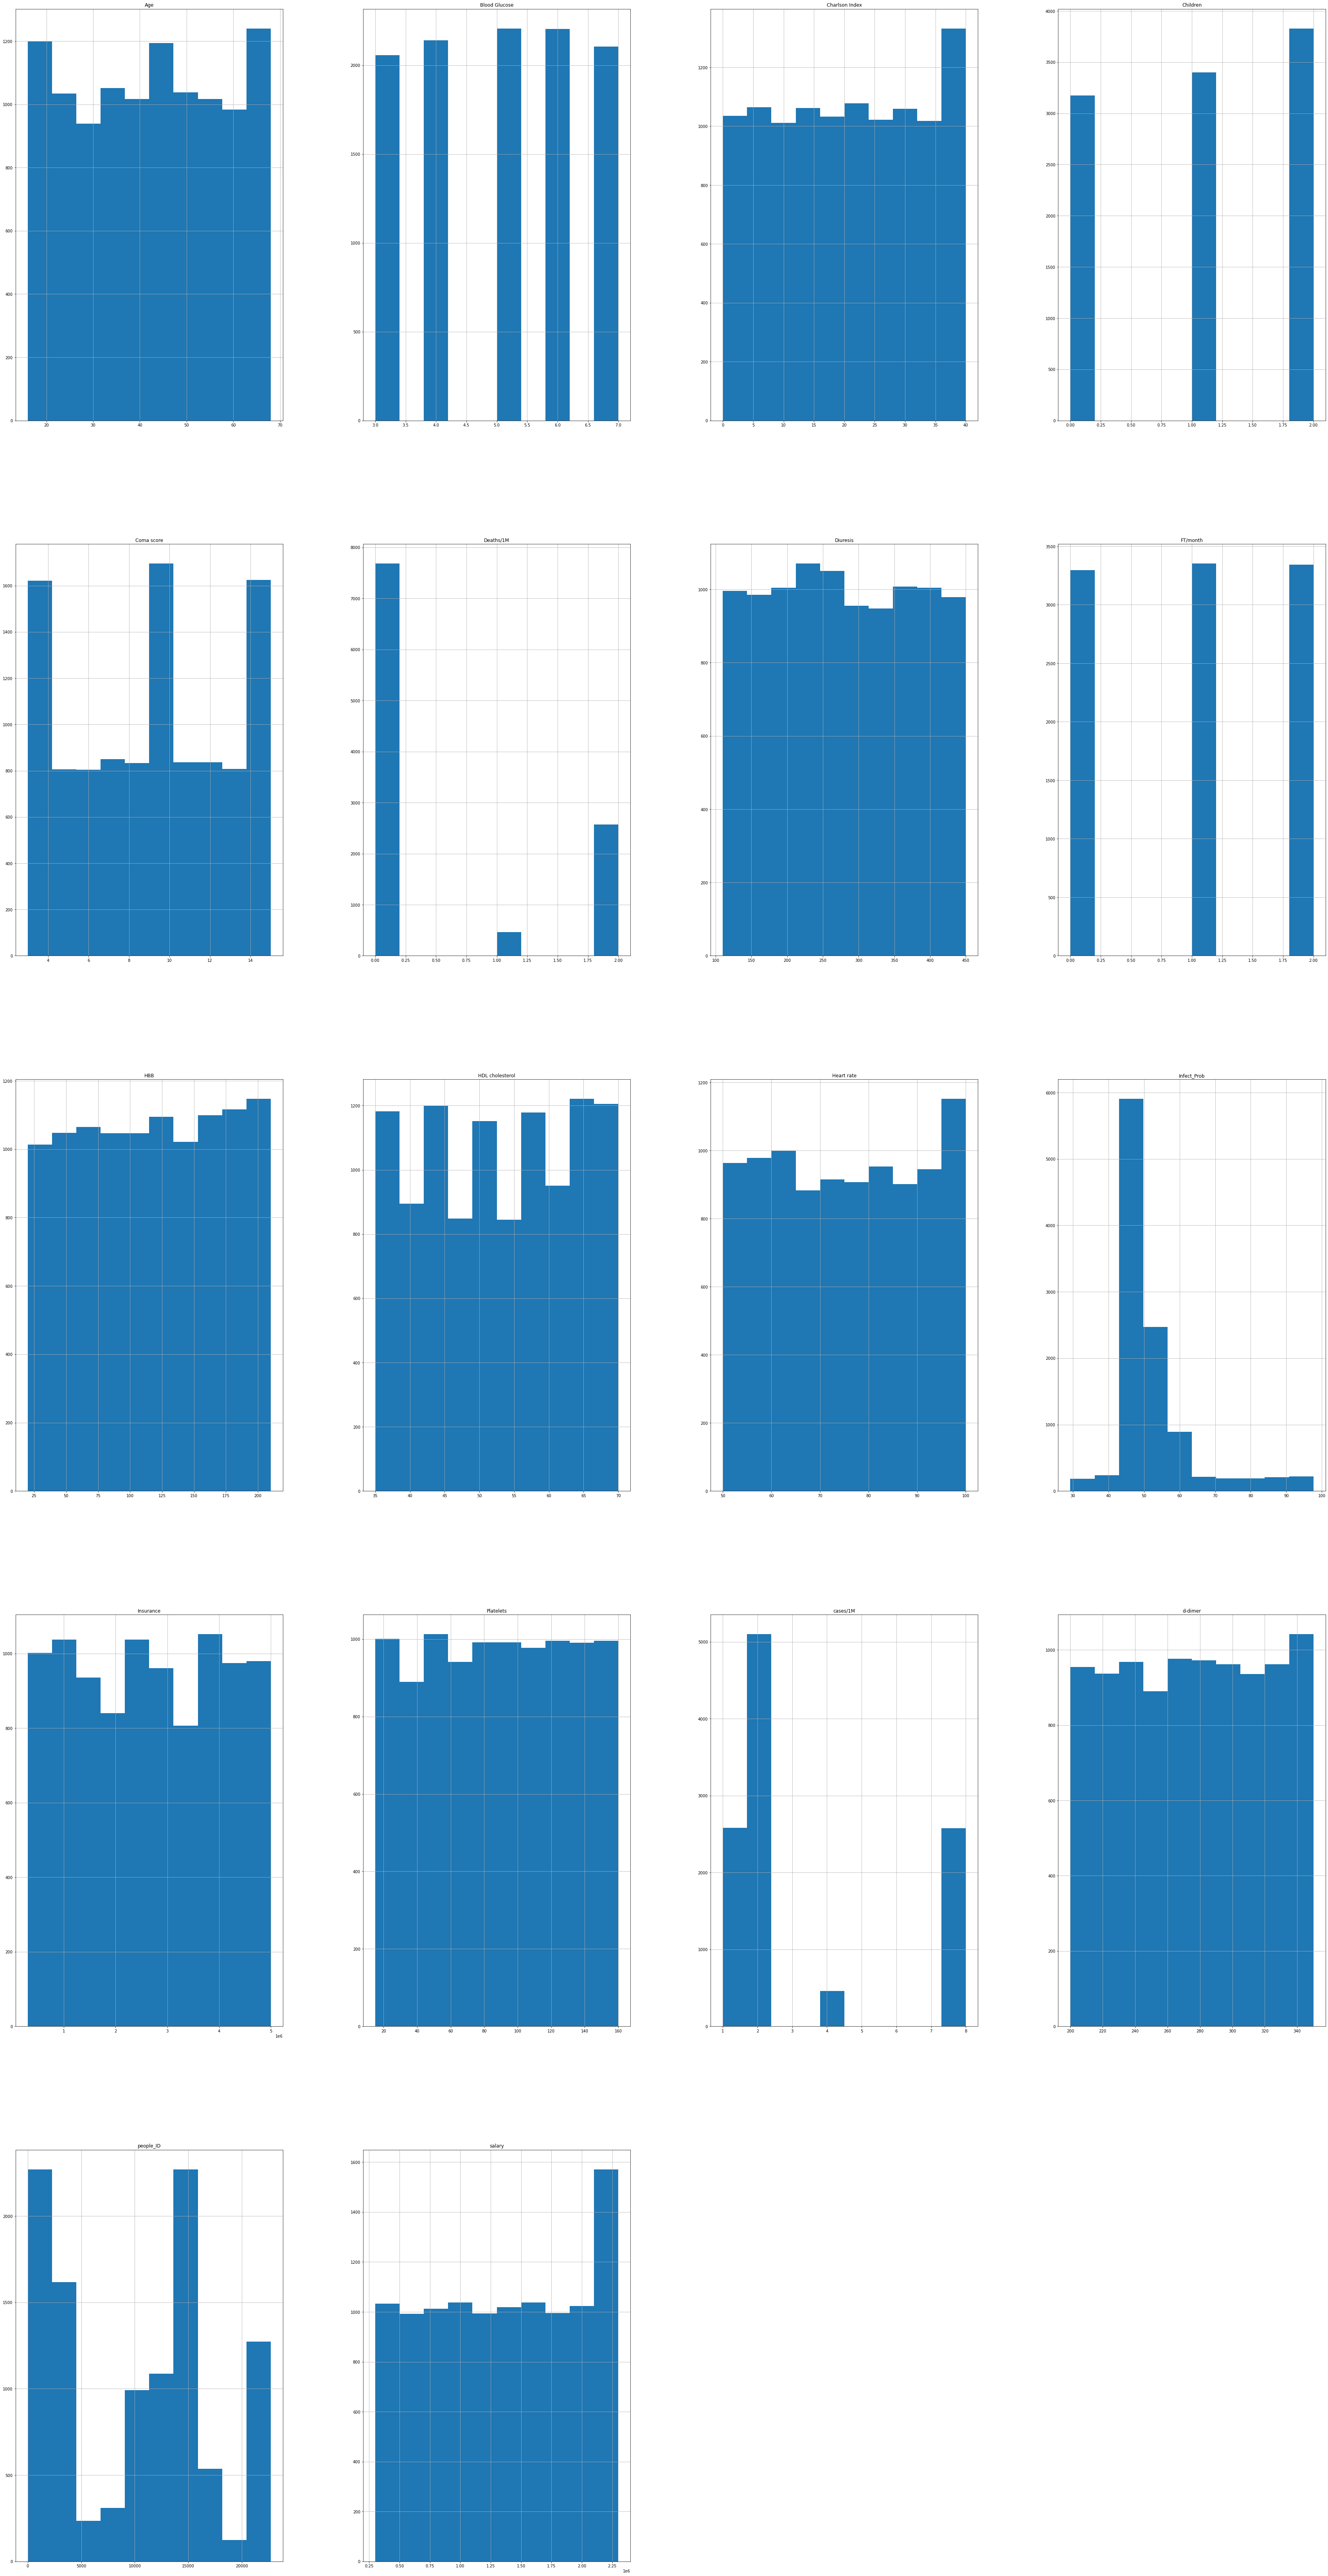

In [8]:
rcParams['figure.figsize'] = 60, 120
train_data.hist()

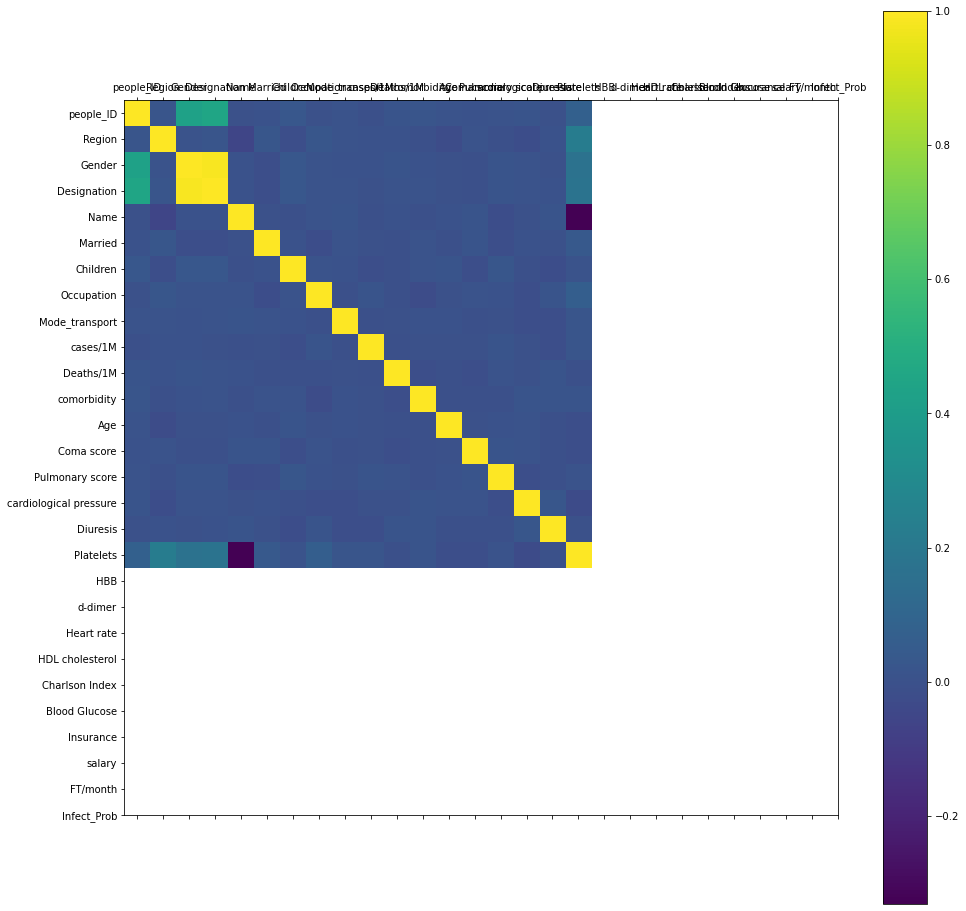

In [9]:
rcParams['figure.figsize'] = 30, 28
plt.matshow(train_data.corr())
plt.yticks(np.arange(train_data.shape[1]), train_data.columns)
plt.xticks(np.arange(train_data.shape[1]), train_data.columns)
plt.colorbar()

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   people_ID               10714 non-null  int64  
 1   Region                  10714 non-null  object 
 2   Gender                  10714 non-null  object 
 3   Designation             10714 non-null  object 
 4   Name                    10694 non-null  object 
 5   Married                 10714 non-null  object 
 6   Children                10403 non-null  float64
 7   Occupation              9967 non-null   object 
 8   Mode_transport          10711 non-null  object 
 9   cases/1M                10714 non-null  int64  
 10  Deaths/1M               10714 non-null  int64  
 11  comorbidity             10488 non-null  object 
 12  Age                     10714 non-null  int64  
 13  Coma score              10714 non-null  int64  
 14  Pulmonary score         10714 non-null

In [11]:
train_data = pd.get_dummies(train_data, columns = ['Gender','Married', 'Designation', 'Occupation', 'Mode_transport','comorbidity', 'Pulmonary score', 'cardiological pressure'])
standardScaler = StandardScaler()

In [12]:
test_data = pd.get_dummies(test_data, columns = ['Gender','Married', 'Designation', 'Occupation', 'Mode_transport','comorbidity', 'Pulmonary score', 'cardiological pressure'])

In [13]:
columns_to_scale = ['Age', 'Children', 'cases/1M', 'Deaths/1M', 'Charlson Index','Blood Glucose','salary']
train_data[columns_to_scale] = standardScaler.fit_transform(train_data[columns_to_scale])

In [14]:
test_data[columns_to_scale] = standardScaler.fit_transform(test_data[columns_to_scale])

In [15]:
train_data=train_data.fillna(0)

In [16]:
test_data = test_data.fillna(0)

In [17]:
test_data_X = test_data.drop(['Region','Name','Designation_Mr','Designation_Mrs'], axis = 1)

In [18]:
y = train_data['Infect_Prob']
X = train_data.drop(['Infect_Prob','Region','Name','Designation_Mr','Designation_Mrs'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [19]:
X_train.head().transpose()

,121,4401,2267,6014,3655
people_ID,1.220000e+02,9.048000e+03,2268.000000,1.312100e+04,3.656000e+03
Children,1.145501e+00,-1.298940e+00,0.000000,-1.298940e+00,-1.298940e+00
cases/1M,-4.725535e-01,1.732399e+00,-0.472554,-4.725535e-01,-8.400456e-01
Deaths/1M,-6.125050e-01,1.728693e+00,-0.612505,-6.125050e-01,-6.125050e-01
Age,-3.970403e-01,5.979879e-02,-1.441244,5.166379e-01,5.166379e-01
Coma score,1.200000e+01,1.300000e+01,4.000000,1.200000e+01,6.000000e+00
Diuresis,1.990000e+02,1.930000e+02,328.000000,1.480000e+02,4.420000e+02
Platelets,0.000000e+00,6.300000e+01,135.000000,7.400000e+01,3.500000e+01
HBB,1.900000e+02,3.700000e+01,132.000000,1.700000e+02,1.660000e+02
d-dimer,0.000000e+00,2.900000e+02,286.000000,3.310000e+02,2.750000e+02


In [20]:
len(y_train)

9642

Text(0, 0.5, 'Cumulative explained variance')

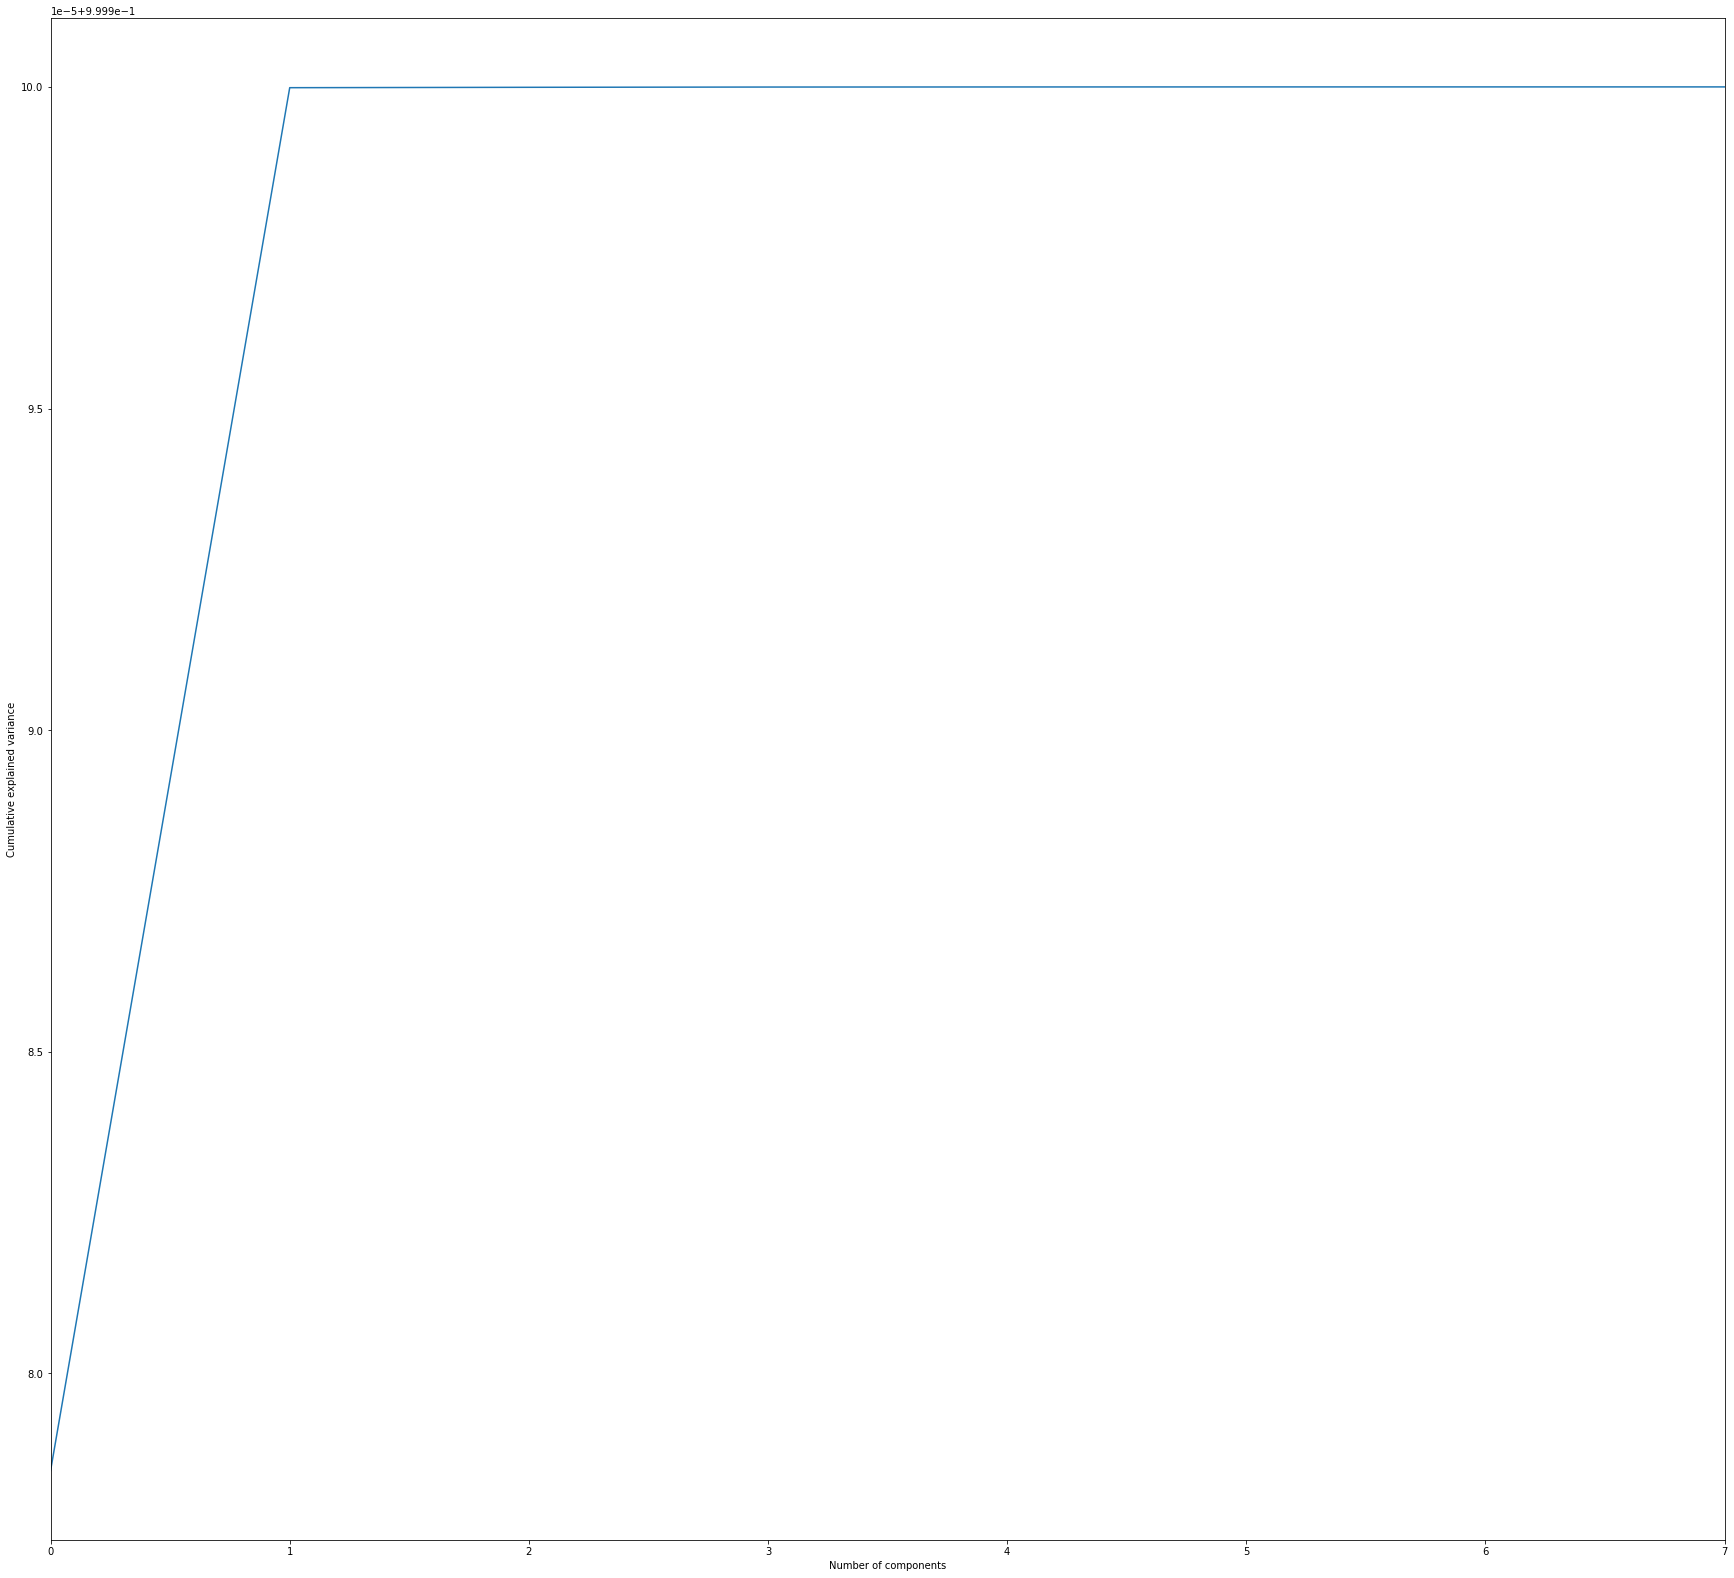

In [21]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

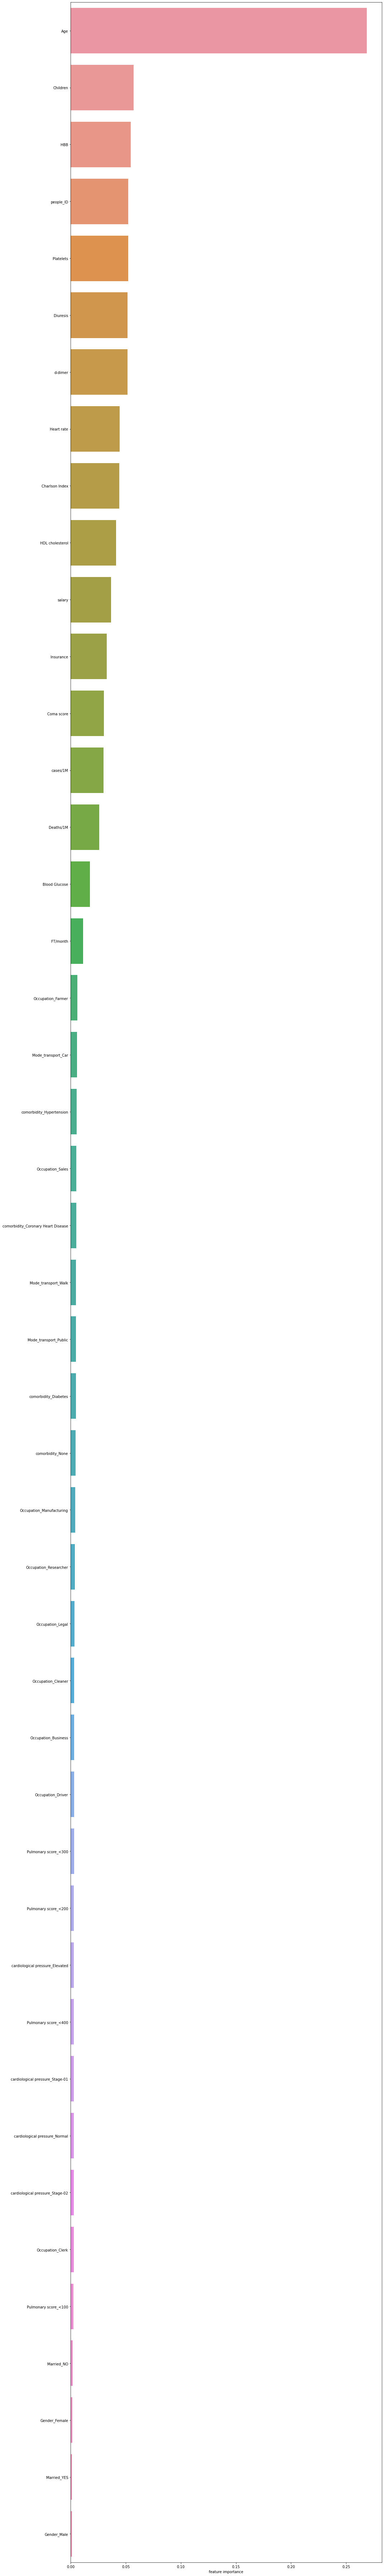

In [38]:
ranking = np.argsort(-rf_regressor.feature_importances_)
f, ax = plt.subplots(figsize=(15, 100))
sns.barplot(x=rf_regressor.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [22]:
model=linear_model.LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
max(y_predict)

68.28684629663779

In [23]:
Y_test=model.predict(X_test)
y_Predict=list(y_test)

In [24]:
error=0
for i in range(len(y_test)):
    error+=(abs(y_Predict[i]-Y_test[i])/y_Predict[i])
test_error_ridge=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_ridge)+" percent in Ridge Regression")

Test error = 8.64602151786004 percent in Ridge Regression


In [25]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [26]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_lr = model.predict(X_test)

#Mutiple Linear Regression Accuracy with test set
accuracy_lf = metrics.r2_score(y_test, y_pred_lr)
print('Mutiple Linear Regression Accuracy: ', accuracy_lf)

#Predicting the Corona using cross validation (KFold method)
y_pred_kf_lr = cross_val_predict(model, X, y, cv=10 )

#Mutiple Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_lr)
print('Cross-Predicted(KFold) Mutiple Linear Regression Accuracy: ', accuracy_lf)

Mutiple Linear Regression Accuracy:  0.250138284467735
Cross-Predicted(KFold) Mutiple Linear Regression Accuracy:  0.2777879761063923


In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
df

,Actual,Predicted
4041,53.072883,52.377079
9305,52.406560,51.264990
10262,47.567603,50.575926
6057,48.914593,48.116691
7071,49.432939,49.728119
...,...,...
565,93.726720,61.910886
1585,66.389760,63.950085
6293,50.282456,50.723859
4795,59.095554,54.802853


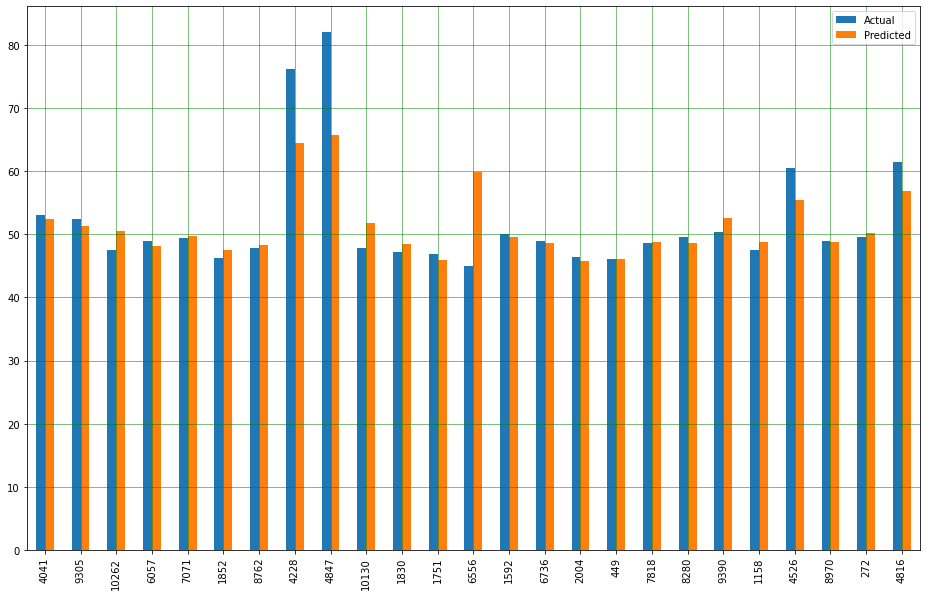

In [28]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [30]:
rf_regressor = RandomForestRegressor(n_estimators = 1024 ,verbose=1,  random_state = 0)
rf_regressor.fit(X_train,y_train)

#Predicting the Covid-19 using test set 
y_pred_rf = rf_regressor.predict(X_test)

#Random Forest Regression Accuracy with test set
print('Random Forest Regression Accuracy: ', (rf_regressor.score(X_test,y_test)*100))

#Predicting the Covid-19 using cross validation (KFold method)
y_pred_rf = cross_val_predict(rf_regressor, X, y, cv=10 )

#Random Forest Regression Accuracy with cross validation
accuracy_rf = metrics.r2_score(y, y_pred_rf)
print('Cross-Predicted(KFold) Random Forest Regression Accuracy: ', accuracy_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1024 out of 1024 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1024 out of 1024 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1024 out of 1024 | elapsed:    0.5s finished


Random Forest Regression Accuracy:  30.25607518838509


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1024 out of 1024 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1024 out of 1024 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1024 out of 1024 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1024 out of 1024 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1024 out of 1024 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1024 out of 1024 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

Cross-Predicted(KFold) Random Forest Regression Accuracy:  0.3182563967518206


[Parallel(n_jobs=1)]: Done 1024 out of 1024 | elapsed:    0.1s finished


In [37]:
import seaborn as sns

In [39]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
df

,Actual,Predicted
4041,53.072883,52.377079
9305,52.406560,51.264990
10262,47.567603,50.575926
6057,48.914593,48.116691
7071,49.432939,49.728119
...,...,...
565,93.726720,61.910886
1585,66.389760,63.950085
6293,50.282456,50.723859
4795,59.095554,54.802853


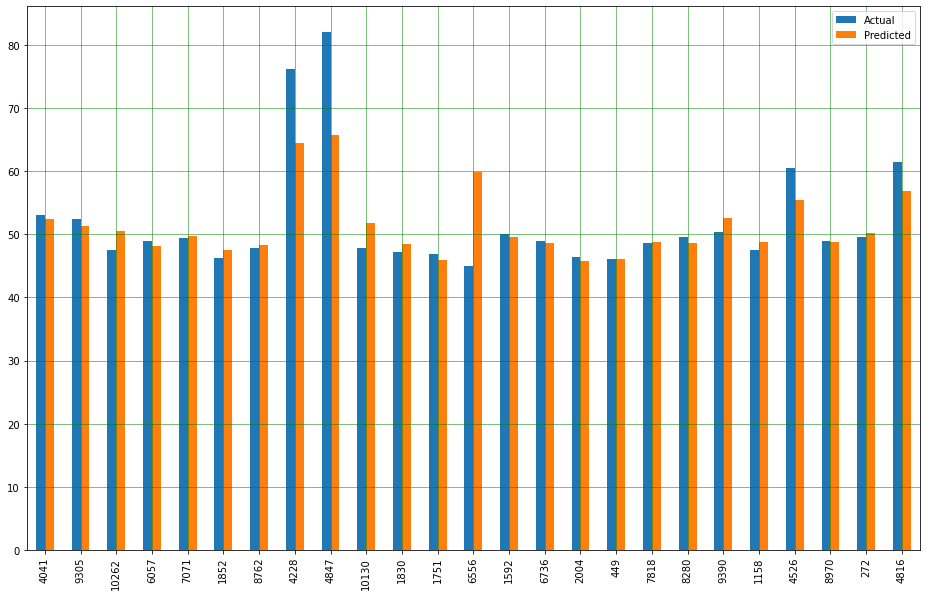

In [40]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [42]:
final_predictions = rf_regressor.predict(test_data_X)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1024 out of 1024 | elapsed:    2.0s finished


In [43]:
X_train.transpose()

,121,4401,2267,6014,3655,4732,9335,1022,9581,6897,...,3468,6744,5874,4373,7891,9225,4859,3264,9845,2732
people_ID,1.220000e+02,9.048000e+03,2268.000000,1.312100e+04,3.656000e+03,9379.000000,1.827600e+04,1.023000e+03,21563.000000,1.400400e+04,...,3.469000e+03,1.385100e+04,1.298100e+04,9.020000e+03,1.499800e+04,1.766700e+04,9.506000e+03,3.265000e+03,2.182700e+04,2.733000e+03
Children,1.145501e+00,-1.298940e+00,0.000000,-1.298940e+00,-1.298940e+00,-1.298940,1.145501e+00,1.145501e+00,-1.298940,1.145501e+00,...,-1.298940e+00,-7.671922e-02,-7.671922e-02,-7.671922e-02,-7.671922e-02,1.145501e+00,-1.298940e+00,-7.671922e-02,-7.671922e-02,-1.298940e+00
cases/1M,-4.725535e-01,1.732399e+00,-0.472554,-4.725535e-01,-8.400456e-01,1.732399,2.624306e-01,-4.725535e-01,1.732399,-4.725535e-01,...,-8.400456e-01,-4.725535e-01,-4.725535e-01,1.732399e+00,-4.725535e-01,2.624306e-01,1.732399e+00,-8.400456e-01,1.732399e+00,-8.400456e-01
Deaths/1M,-6.125050e-01,1.728693e+00,-0.612505,-6.125050e-01,-6.125050e-01,1.728693,5.580941e-01,-6.125050e-01,1.728693,-6.125050e-01,...,-6.125050e-01,-6.125050e-01,-6.125050e-01,1.728693e+00,-6.125050e-01,5.580941e-01,1.728693e+00,-6.125050e-01,1.728693e+00,-6.125050e-01
Age,-3.970403e-01,5.979879e-02,-1.441244,5.166379e-01,5.166379e-01,-1.310718,1.626104e+00,-4.623030e-01,-0.005464,-9.191421e-01,...,3.861124e-01,-2.665149e-01,7.776888e-01,-7.233539e-01,-7.886167e-01,-5.463941e-03,-3.317776e-01,1.365053e+00,1.038740e+00,-4.623030e-01
Coma score,1.200000e+01,1.300000e+01,4.000000,1.200000e+01,6.000000e+00,7.000000,1.100000e+01,1.000000e+01,14.000000,6.000000e+00,...,1.000000e+01,5.000000e+00,1.500000e+01,4.000000e+00,7.000000e+00,1.500000e+01,7.000000e+00,4.000000e+00,3.000000e+00,7.000000e+00
Diuresis,1.990000e+02,1.930000e+02,328.000000,1.480000e+02,4.420000e+02,149.000000,0.000000e+00,1.100000e+02,312.000000,1.930000e+02,...,2.600000e+02,2.350000e+02,3.640000e+02,2.760000e+02,2.420000e+02,1.890000e+02,3.200000e+02,3.600000e+02,2.080000e+02,3.880000e+02
Platelets,0.000000e+00,6.300000e+01,135.000000,7.400000e+01,3.500000e+01,124.000000,6.700000e+01,0.000000e+00,84.000000,9.500000e+01,...,1.120000e+02,1.360000e+02,8.600000e+01,3.200000e+01,9.000000e+01,0.000000e+00,1.200000e+02,5.400000e+01,6.100000e+01,6.900000e+01
HBB,1.900000e+02,3.700000e+01,132.000000,1.700000e+02,1.660000e+02,156.000000,1.280000e+02,7.000000e+01,52.000000,1.960000e+02,...,8.800000e+01,3.900000e+01,8.700000e+01,1.050000e+02,1.920000e+02,2.800000e+01,8.200000e+01,1.820000e+02,1.150000e+02,3.900000e+01
d-dimer,0.000000e+00,2.900000e+02,286.000000,3.310000e+02,2.750000e+02,213.000000,2.640000e+02,0.000000e+00,253.000000,3.230000e+02,...,2.390000e+02,3.360000e+02,2.250000e+02,3.470000e+02,3.290000e+02,0.000000e+00,2.060000e+02,2.920000e+02,2.640000e+02,2.750000e+02


In [44]:
test_data_X

,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,...,comorbidity_Hypertension,comorbidity_None,Pulmonary score_<100,Pulmonary score_<200,Pulmonary score_<300,Pulmonary score_<400,cardiological pressure_Elevated,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,5942,1.257737,-0.405615,-0.359439,0.647031,3,388,153,196,240,...,0,0,0,1,0,0,0,0,1,0
1,18664,1.257737,-0.405615,-0.359439,0.712280,11,409,95,138,241,...,0,0,0,1,0,0,0,0,1,0
2,5603,1.257737,-0.405615,-0.359439,-0.462202,9,440,40,166,236,...,0,0,1,0,0,0,0,0,0,1
3,5649,1.257737,-0.405615,-0.359439,-0.723199,12,206,78,83,211,...,0,1,0,0,1,0,1,0,0,0
4,5099,1.257737,-0.405615,-0.359439,0.581782,6,229,109,207,312,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14493,23737,-1.205908,1.099255,0.689293,0.842778,5,417,16,36,346,...,0,0,0,0,0,1,0,1,0,0
14494,11171,-1.205908,1.099255,0.689293,0.125039,4,199,22,29,278,...,0,1,0,0,1,0,1,0,0,0
14495,23243,-1.205908,1.099255,0.689293,0.255537,6,161,15,28,294,...,0,1,0,0,1,0,1,0,0,0
14496,11199,-1.205908,1.099255,0.689293,-0.527451,5,174,31,24,227,...,0,0,0,1,0,0,0,0,1,0


In [46]:
PREDICTIONS = df = pd.DataFrame({'people_ID': test_data_X['people_ID'], 'Predicted %': final_predictions})
PREDICTIONS

,people_ID,Predicted %
0,5942,50.428785
1,18664,50.511225
2,5603,50.265391
3,5649,50.185280
4,5099,50.307205
...,...,...
14493,23737,45.378146
14494,11171,45.505668
14495,23243,45.391811
14496,11199,45.197001


In [47]:
PREDICTIONS.to_csv("prediction20thMarch",index=False)

FInal Result

In [48]:
A = pd.read_csv("prediction20thMarch")
A

,people_ID,Predicted %
0,5942,50.428785
1,18664,50.511225
2,5603,50.265391
3,5649,50.185280
4,5099,50.307205
...,...,...
14493,23737,45.378146
14494,11171,45.505668
14495,23243,45.391811
14496,11199,45.197001


In [49]:
!git add *


The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


In [50]:
!git commit -m "task 1 done using RandomForest"

[master 072b276] task 1 done using RandomForest
 3 files changed, 17176 insertions(+), 371 deletions(-)
 create mode 100644 .ipynb_checkpoints/Covid-19_predictor-checkpoint.ipynb
 create mode 100644 prediction20thMarch


In [51]:
!git push origin master

To https://github.com/shubham2637/COVID-19-predictions.git
   fb91988..072b276  master -> master
